# Logistic Regression

## Importing the libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import mglearn

## Importing the dataset

In [47]:
# Load dataset
dataset = pd.read_csv('HeartDisease.csv')

# Menampilkan beberapa baris pertama dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Splitting the dataset into the Training set and Test set

In [48]:
# Menghapus baris yang mengandung NaN dan menyimpan hasilnya
dataset = dataset.dropna()

# Memisahkan fitur dan target
X = dataset.drop('num', axis=1)  # Fitur
y = dataset['num']  # Target

# Membagi dataset menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Training the Logistic Regression model on the Training set

In [49]:
# Membuat model Logistic Regression
model = LogisticRegression()

# Melatih model dengan training set
model.fit(X_train, y_train)

LogisticRegression()


Model Evaluation Metrics:
Akurasi: 0.62
Presisi: 0.56
Recall: 0.62
F1-Score: 0.58
AUC-ROC: 0.76

Confusion Matrix:
[[34  1  0  1  0]
 [ 5  1  0  2  1]
 [ 2  1  1  1  0]
 [ 1  2  1  1  2]
 [ 1  1  0  1  0]]


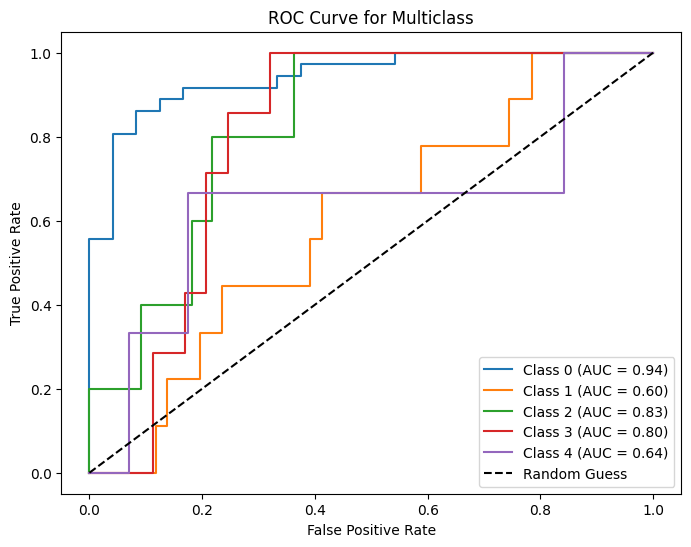


Decision Boundary Visualization is only available for 2 features.


In [50]:
# 9. Memprediksi Hasil pada Test Set
# Memprediksi hasil pada test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif

# 10. Evaluasi Model
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')        
f1 = f1_score(y_test, y_pred, average='weighted')                

# AUC-ROC
if len(np.unique(y_test)) > 2:
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')  # one-vs-rest
else:
    roc_auc = roc_auc_score(y_test, y_pred_proba)

# Menampilkan hasil evaluasi
print("\nModel Evaluation Metrics:")
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 11. Visualisasi ROC Curve 
# Binarize the output (One-vs-Rest approach)
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_proba = model.predict_proba(X_test)

# Hitung ROC Curve dan AUC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend()
plt.show()

# 12. Visualisasi Decision Boundary (Opsional)
# Jika dataset memiliki 2 fitur, kita bisa memvisualisasikan decision boundary
if X_train.shape[1] == 2:
    mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=0.3)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()
else:
    print("\nDecision Boundary Visualization is only available for 2 features.")

### Explanation of Mathematical Equations

1. **Akurasi (Accuracy)**
    Akurasi mengukur seberapa sering model melakukan prediksi yang benar. Ini adalah rasio prediksi benar terhadap total prediksi.
    Rumus : 
    
    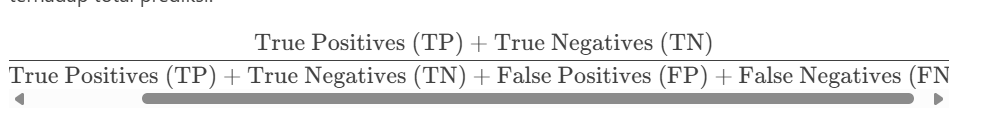
    
    True Positives (TP): Jumlah sampel yang benar diprediksi sebagai positif.
    True Negatives (TN): Jumlah sampel yang benar diprediksi sebagai negatif.
    False Positives (FP): Jumlah sampel yang salah diprediksi sebagai positif (seharusnya negatif).False Negatives (FN): Jumlah sampel yang salah diprediksi sebagai negatif (seharusnya positif).
    
2. **Presisi (Precision)**
    Presisi mengukur seberapa banyak prediksi positif yang benar. Ini adalah rasio prediksi positif benar terhadap total prediksi positif.

    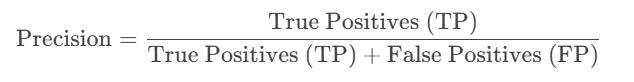

    Presisi tinggi berarti model jarang salah memprediksi positif (FP rendah).

3. **Recall (Sensitivity atau True Positive Rate)**
    Recall mengukur seberapa banyak kasus positif yang berhasil diidentifikasi oleh model. Ini adalah rasio prediksi positif benar terhadap total kasus positif sebenarnya.

    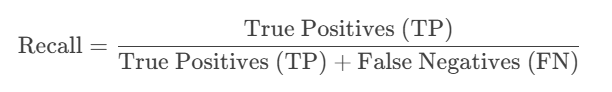

    Recall tinggi berarti model jarang melewatkan kasus positif (FN rendah).

4. **F1-Score**
    F1-Score adalah rata-rata harmonik dari presisi dan recall. Ini berguna ketika Anda ingin menyeimbangkan presisi dan recall.

    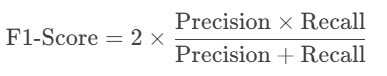

    F1-Score tinggi berarti model memiliki presisi dan recall yang seimbang.

5. **ROC Curve dan AUC (Area Under Curve)**
    ROC Curve adalah grafik yang memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR) untuk berbagai threshold klasifikasi.

    True Positive Rate (TPR):

    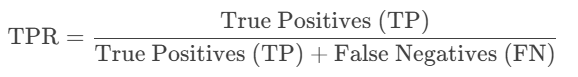

    False Positive Rate (FPR):

    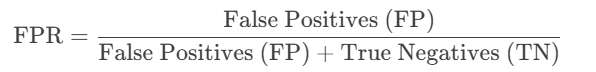

    AUC (Area Under Curve): Area di bawah ROC Curve. Nilai AUC berkisar antara 0 dan 1, di mana:    
    - AUC = 1: Model sempurna.
    - AUC = 0.5: Model tidak lebih baik dari tebakan acak.
    - AUC < 0.5: Model lebih buruk dari tebakan acak.